In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/2-4/traderIDs_1000_5000_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/2-4/stockPool_1000_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/2-4/hurstPool_1000_5000_100_2_5.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/2-4/totalOrders_1000_5000_100_2_5.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,2,993,pcaot,6,1.0
1,0,993,vpneq,10,2.0
2,3,993,vpneq,13,-1.0
3,2,993,jzndk,14,1.0
4,1,993,jwivu,13,-2.0
...,...,...,...,...,...
2139960,2,5992,khrsl,62,4.0
2139961,0,5992,sujzt,75,-6.0
2139962,1,5992,sujzt,62,4.0
2139963,0,5992,gdnqf,75,-91.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [5]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [6]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades22_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965
Cascade length:  4575
New Orders left:  2135390
making new cascade


OG Orders left:  2135390
Cascade length:  6280
New Orders left:  2129110
making new cascade


OG Orders left:  2129110
Cascade length:  6050
New Orders left:  2123060
making new cascade


OG Orders left:  2123060
Cascade length:  5639
New Orders left:  2117421
making new cascade


OG Orders left:  2117421
Cascade length:  4379
New Orders left:  2113042
making new cascade


OG Orders left:  2113042
Cascade length:  4468
New Orders left:  2108574
making new cascade


OG Orders left:  2108574
Cascade length:  4449
New Orders left:  2104125
making new cascade


OG Orders left:  2104125
Cascade length:  4932
New Orders left:  2099193
making new cascade


OG Orders left:  2099193
Cascade length:  4942
New Orders left:  2094251
making new cascade


OG Orders left:  2094251
Cascade length:  4919
New Orders left:  2089332
making new cascade


OG Orders left:  2089332
Cascade length:  2
New Orders left:

Cascade length:  6
New Orders left:  1898557
making new cascade


OG Orders left:  1898557
Cascade length:  3053
New Orders left:  1895504
making new cascade


OG Orders left:  1895504
Cascade length:  1818
New Orders left:  1893686
making new cascade


OG Orders left:  1893686
Cascade length:  28
New Orders left:  1893658
making new cascade


OG Orders left:  1893658
Cascade length:  1011
New Orders left:  1892647
making new cascade


OG Orders left:  1892647
Cascade length:  5
New Orders left:  1892642
making new cascade


OG Orders left:  1892642
Cascade length:  2719
New Orders left:  1889923
making new cascade


OG Orders left:  1889923
Cascade length:  1267
New Orders left:  1888656
making new cascade


OG Orders left:  1888656
Cascade length:  4
New Orders left:  1888652
making new cascade


OG Orders left:  1888652
Cascade length:  2565
New Orders left:  1886087
making new cascade


OG Orders left:  1886087
Cascade length:  1945
New Orders left:  1884142
making new cascade


OG

Cascade length:  785
New Orders left:  1809553
making new cascade


OG Orders left:  1809553
Cascade length:  25
New Orders left:  1809528
making new cascade


OG Orders left:  1809528
Cascade length:  4
New Orders left:  1809524
making new cascade


OG Orders left:  1809524
Cascade length:  20
New Orders left:  1809504
making new cascade


OG Orders left:  1809504
Cascade length:  508
New Orders left:  1808996
making new cascade


OG Orders left:  1808996
Cascade length:  1899
New Orders left:  1807097
making new cascade


OG Orders left:  1807097
Cascade length:  1405
New Orders left:  1805692
making new cascade


OG Orders left:  1805692
Cascade length:  9
New Orders left:  1805683
making new cascade


OG Orders left:  1805683
Cascade length:  72
New Orders left:  1805611
making new cascade


OG Orders left:  1805611
Cascade length:  1670
New Orders left:  1803941
making new cascade


OG Orders left:  1803941
Cascade length:  1915
New Orders left:  1802026
making new cascade


OG Or

Cascade length:  3
New Orders left:  1742666
making new cascade


OG Orders left:  1742666
Cascade length:  1798
New Orders left:  1740868
making new cascade


OG Orders left:  1740868
Cascade length:  2
New Orders left:  1740866
making new cascade


OG Orders left:  1740866
Cascade length:  8
New Orders left:  1740858
making new cascade


OG Orders left:  1740858
Cascade length:  1806
New Orders left:  1739052
making new cascade


OG Orders left:  1739052
Cascade length:  51
New Orders left:  1739001
making new cascade


OG Orders left:  1739001
Cascade length:  6
New Orders left:  1738995
making new cascade


OG Orders left:  1738995
Cascade length:  1108
New Orders left:  1737887
making new cascade


OG Orders left:  1737887
Cascade length:  4
New Orders left:  1737883
making new cascade


OG Orders left:  1737883
Cascade length:  7
New Orders left:  1737876
making new cascade


OG Orders left:  1737876
Cascade length:  7
New Orders left:  1737869
making new cascade


OG Orders left

Cascade length:  138
New Orders left:  1688320
making new cascade


OG Orders left:  1688320
Cascade length:  6
New Orders left:  1688314
making new cascade


OG Orders left:  1688314
Cascade length:  3
New Orders left:  1688311
making new cascade


OG Orders left:  1688311
Cascade length:  36
New Orders left:  1688275
making new cascade


OG Orders left:  1688275
Cascade length:  47
New Orders left:  1688228
making new cascade


OG Orders left:  1688228
Cascade length:  34
New Orders left:  1688194
making new cascade


OG Orders left:  1688194
Cascade length:  1257
New Orders left:  1686937
making new cascade


OG Orders left:  1686937
Cascade length:  2393
New Orders left:  1684544
making new cascade


OG Orders left:  1684544
Cascade length:  15
New Orders left:  1684529
making new cascade


OG Orders left:  1684529
Cascade length:  6
New Orders left:  1684523
making new cascade


OG Orders left:  1684523
Cascade length:  78
New Orders left:  1684445
making new cascade


OG Orders l

Cascade length:  4
New Orders left:  1646314
making new cascade


OG Orders left:  1646314
Cascade length:  38
New Orders left:  1646276
making new cascade


OG Orders left:  1646276
Cascade length:  21
New Orders left:  1646255
making new cascade


OG Orders left:  1646255
Cascade length:  22
New Orders left:  1646233
making new cascade


OG Orders left:  1646233
Cascade length:  2139
New Orders left:  1644094
making new cascade


OG Orders left:  1644094
Cascade length:  2647
New Orders left:  1641447
making new cascade


OG Orders left:  1641447
Cascade length:  2507
New Orders left:  1638940
making new cascade


OG Orders left:  1638940
Cascade length:  1202
New Orders left:  1637738
making new cascade


OG Orders left:  1637738
Cascade length:  49
New Orders left:  1637689
making new cascade


OG Orders left:  1637689
Cascade length:  162
New Orders left:  1637527
making new cascade


OG Orders left:  1637527
Cascade length:  3
New Orders left:  1637524
making new cascade


OG Ord

Cascade length:  1732
New Orders left:  1604334
making new cascade


OG Orders left:  1604334
Cascade length:  1
New Orders left:  1604333
making new cascade


OG Orders left:  1604333
Cascade length:  1
New Orders left:  1604332
making new cascade


OG Orders left:  1604332
Cascade length:  254
New Orders left:  1604078
making new cascade


OG Orders left:  1604078
Cascade length:  4
New Orders left:  1604074
making new cascade


OG Orders left:  1604074
Cascade length:  28
New Orders left:  1604046
making new cascade


OG Orders left:  1604046
Cascade length:  2000
New Orders left:  1602046
making new cascade


OG Orders left:  1602046
Cascade length:  1611
New Orders left:  1600435
making new cascade


OG Orders left:  1600435
Cascade length:  4
New Orders left:  1600431
making new cascade


OG Orders left:  1600431
Cascade length:  4
New Orders left:  1600427
making new cascade


OG Orders left:  1600427
Cascade length:  1966
New Orders left:  1598461
making new cascade


OG Orders

Cascade length:  6
New Orders left:  1555847
making new cascade


OG Orders left:  1555847
Cascade length:  4
New Orders left:  1555843
making new cascade


OG Orders left:  1555843
Cascade length:  2983
New Orders left:  1552860
making new cascade


OG Orders left:  1552860
Cascade length:  25
New Orders left:  1552835
making new cascade


OG Orders left:  1552835
Cascade length:  158
New Orders left:  1552677
making new cascade


OG Orders left:  1552677
Cascade length:  1334
New Orders left:  1551343
making new cascade


OG Orders left:  1551343
Cascade length:  2279
New Orders left:  1549064
making new cascade


OG Orders left:  1549064
Cascade length:  27
New Orders left:  1549037
making new cascade


OG Orders left:  1549037
Cascade length:  2
New Orders left:  1549035
making new cascade


OG Orders left:  1549035
Cascade length:  18
New Orders left:  1549017
making new cascade


OG Orders left:  1549017
Cascade length:  110
New Orders left:  1548907
making new cascade


OG Order

Cascade length:  944
New Orders left:  1507527
making new cascade


OG Orders left:  1507527
Cascade length:  11
New Orders left:  1507516
making new cascade


OG Orders left:  1507516
Cascade length:  17
New Orders left:  1507499
making new cascade


OG Orders left:  1507499
Cascade length:  2055
New Orders left:  1505444
making new cascade


OG Orders left:  1505444
Cascade length:  1183
New Orders left:  1504261
making new cascade


OG Orders left:  1504261
Cascade length:  9
New Orders left:  1504252
making new cascade


OG Orders left:  1504252
Cascade length:  1022
New Orders left:  1503230
making new cascade


OG Orders left:  1503230
Cascade length:  3
New Orders left:  1503227
making new cascade


OG Orders left:  1503227
Cascade length:  664
New Orders left:  1502563
making new cascade


OG Orders left:  1502563
Cascade length:  2
New Orders left:  1502561
making new cascade


OG Orders left:  1502561
Cascade length:  916
New Orders left:  1501645
making new cascade


OG Orde

Cascade length:  1125
New Orders left:  1445016
making new cascade


OG Orders left:  1445016
Cascade length:  483
New Orders left:  1444533
making new cascade


OG Orders left:  1444533
Cascade length:  15
New Orders left:  1444518
making new cascade


OG Orders left:  1444518
Cascade length:  1665
New Orders left:  1442853
making new cascade


OG Orders left:  1442853
Cascade length:  20
New Orders left:  1442833
making new cascade


OG Orders left:  1442833
Cascade length:  26
New Orders left:  1442807
making new cascade


OG Orders left:  1442807
Cascade length:  10
New Orders left:  1442797
making new cascade


OG Orders left:  1442797
Cascade length:  1511
New Orders left:  1441286
making new cascade


OG Orders left:  1441286
Cascade length:  43
New Orders left:  1441243
making new cascade


OG Orders left:  1441243
Cascade length:  1799
New Orders left:  1439444
making new cascade


OG Orders left:  1439444
Cascade length:  55
New Orders left:  1439389
making new cascade


OG O

Cascade length:  1280
New Orders left:  1399503
making new cascade


OG Orders left:  1399503
Cascade length:  271
New Orders left:  1399232
making new cascade


OG Orders left:  1399232
Cascade length:  1
New Orders left:  1399231
making new cascade


OG Orders left:  1399231
Cascade length:  1
New Orders left:  1399230
making new cascade


OG Orders left:  1399230
Cascade length:  98
New Orders left:  1399132
making new cascade


OG Orders left:  1399132
Cascade length:  1566
New Orders left:  1397566
making new cascade


OG Orders left:  1397566
Cascade length:  59
New Orders left:  1397507
making new cascade


OG Orders left:  1397507
Cascade length:  1491
New Orders left:  1396016
making new cascade


OG Orders left:  1396016
Cascade length:  5
New Orders left:  1396011
making new cascade


OG Orders left:  1396011
Cascade length:  650
New Orders left:  1395361
making new cascade


OG Orders left:  1395361
Cascade length:  48
New Orders left:  1395313
making new cascade


OG Order

Cascade length:  256
New Orders left:  1329426
making new cascade


OG Orders left:  1329426
Cascade length:  1292
New Orders left:  1328134
making new cascade


OG Orders left:  1328134
Cascade length:  1329
New Orders left:  1326805
making new cascade


OG Orders left:  1326805
Cascade length:  8
New Orders left:  1326797
making new cascade


OG Orders left:  1326797
Cascade length:  2
New Orders left:  1326795
making new cascade


OG Orders left:  1326795
Cascade length:  2
New Orders left:  1326793
making new cascade


OG Orders left:  1326793
Cascade length:  57
New Orders left:  1326736
making new cascade


OG Orders left:  1326736
Cascade length:  98
New Orders left:  1326638
making new cascade


OG Orders left:  1326638
Cascade length:  23
New Orders left:  1326615
making new cascade


OG Orders left:  1326615
Cascade length:  1027
New Orders left:  1325588
making new cascade


OG Orders left:  1325588
Cascade length:  2
New Orders left:  1325586
making new cascade


OG Orders 

Cascade length:  59
New Orders left:  1294917
making new cascade


OG Orders left:  1294917
Cascade length:  24
New Orders left:  1294893
making new cascade


OG Orders left:  1294893
Cascade length:  64
New Orders left:  1294829
making new cascade


OG Orders left:  1294829
Cascade length:  670
New Orders left:  1294159
making new cascade


OG Orders left:  1294159
Cascade length:  2
New Orders left:  1294157
making new cascade


OG Orders left:  1294157
Cascade length:  33
New Orders left:  1294124
making new cascade


OG Orders left:  1294124
Cascade length:  1587
New Orders left:  1292537
making new cascade


OG Orders left:  1292537
Cascade length:  620
New Orders left:  1291917
making new cascade


OG Orders left:  1291917
Cascade length:  2421
New Orders left:  1289496
making new cascade


OG Orders left:  1289496
Cascade length:  13
New Orders left:  1289483
making new cascade


OG Orders left:  1289483
Cascade length:  1180
New Orders left:  1288303
making new cascade


OG Ord

Cascade length:  17
New Orders left:  1246796
making new cascade


OG Orders left:  1246796
Cascade length:  1365
New Orders left:  1245431
making new cascade


OG Orders left:  1245431
Cascade length:  1
New Orders left:  1245430
making new cascade


OG Orders left:  1245430
Cascade length:  157
New Orders left:  1245273
making new cascade


OG Orders left:  1245273
Cascade length:  2273
New Orders left:  1243000
making new cascade


OG Orders left:  1243000
Cascade length:  18
New Orders left:  1242982
making new cascade


OG Orders left:  1242982
Cascade length:  45
New Orders left:  1242937
making new cascade


OG Orders left:  1242937
Cascade length:  1
New Orders left:  1242936
making new cascade


OG Orders left:  1242936
Cascade length:  15
New Orders left:  1242921
making new cascade


OG Orders left:  1242921
Cascade length:  730
New Orders left:  1242191
making new cascade


OG Orders left:  1242191
Cascade length:  20
New Orders left:  1242171
making new cascade


OG Orders

Cascade length:  1173
New Orders left:  1195275
making new cascade


OG Orders left:  1195275
Cascade length:  59
New Orders left:  1195216
making new cascade


OG Orders left:  1195216
Cascade length:  11
New Orders left:  1195205
making new cascade


OG Orders left:  1195205
Cascade length:  2156
New Orders left:  1193049
making new cascade


OG Orders left:  1193049
Cascade length:  14
New Orders left:  1193035
making new cascade


OG Orders left:  1193035
Cascade length:  1270
New Orders left:  1191765
making new cascade


OG Orders left:  1191765
Cascade length:  27
New Orders left:  1191738
making new cascade


OG Orders left:  1191738
Cascade length:  876
New Orders left:  1190862
making new cascade


OG Orders left:  1190862
Cascade length:  2848
New Orders left:  1188014
making new cascade


OG Orders left:  1188014
Cascade length:  19
New Orders left:  1187995
making new cascade


OG Orders left:  1187995
Cascade length:  20
New Orders left:  1187975
making new cascade


OG O

Cascade length:  6
New Orders left:  1147617
making new cascade


OG Orders left:  1147617
Cascade length:  10
New Orders left:  1147607
making new cascade


OG Orders left:  1147607
Cascade length:  735
New Orders left:  1146872
making new cascade


OG Orders left:  1146872
Cascade length:  1418
New Orders left:  1145454
making new cascade


OG Orders left:  1145454
Cascade length:  149
New Orders left:  1145305
making new cascade


OG Orders left:  1145305
Cascade length:  1930
New Orders left:  1143375
making new cascade


OG Orders left:  1143375
Cascade length:  12
New Orders left:  1143363
making new cascade


OG Orders left:  1143363
Cascade length:  176
New Orders left:  1143187
making new cascade


OG Orders left:  1143187
Cascade length:  1170
New Orders left:  1142017
making new cascade


OG Orders left:  1142017
Cascade length:  45
New Orders left:  1141972
making new cascade


OG Orders left:  1141972
Cascade length:  1
New Orders left:  1141971
making new cascade


OG Ord

Cascade length:  1254
New Orders left:  1095990
making new cascade


OG Orders left:  1095990
Cascade length:  1746
New Orders left:  1094244
making new cascade


OG Orders left:  1094244
Cascade length:  1759
New Orders left:  1092485
making new cascade


OG Orders left:  1092485
Cascade length:  3
New Orders left:  1092482
making new cascade


OG Orders left:  1092482
Cascade length:  2
New Orders left:  1092480
making new cascade


OG Orders left:  1092480
Cascade length:  61
New Orders left:  1092419
making new cascade


OG Orders left:  1092419
Cascade length:  410
New Orders left:  1092009
making new cascade


OG Orders left:  1092009
Cascade length:  10
New Orders left:  1091999
making new cascade


OG Orders left:  1091999
Cascade length:  14
New Orders left:  1091985
making new cascade


OG Orders left:  1091985
Cascade length:  884
New Orders left:  1091101
making new cascade


OG Orders left:  1091101
Cascade length:  31
New Orders left:  1091070
making new cascade


OG Orde

Cascade length:  407
New Orders left:  1050219
making new cascade


OG Orders left:  1050219
Cascade length:  700
New Orders left:  1049519
making new cascade


OG Orders left:  1049519
Cascade length:  2
New Orders left:  1049517
making new cascade


OG Orders left:  1049517
Cascade length:  45
New Orders left:  1049472
making new cascade


OG Orders left:  1049472
Cascade length:  1010
New Orders left:  1048462
making new cascade


OG Orders left:  1048462
Cascade length:  59
New Orders left:  1048403
making new cascade


OG Orders left:  1048403
Cascade length:  65
New Orders left:  1048338
making new cascade


OG Orders left:  1048338
Cascade length:  43
New Orders left:  1048295
making new cascade


OG Orders left:  1048295
Cascade length:  1590
New Orders left:  1046705
making new cascade


OG Orders left:  1046705
Cascade length:  69
New Orders left:  1046636
making new cascade


OG Orders left:  1046636
Cascade length:  2
New Orders left:  1046634
making new cascade


OG Orders

Cascade length:  3
New Orders left:  1010021
making new cascade


OG Orders left:  1010021
Cascade length:  28
New Orders left:  1009993
making new cascade


OG Orders left:  1009993
Cascade length:  26
New Orders left:  1009967
making new cascade


OG Orders left:  1009967
Cascade length:  15
New Orders left:  1009952
making new cascade


OG Orders left:  1009952
Cascade length:  2189
New Orders left:  1007763
making new cascade


OG Orders left:  1007763
Cascade length:  8
New Orders left:  1007755
making new cascade


OG Orders left:  1007755
Cascade length:  2162
New Orders left:  1005593
making new cascade


OG Orders left:  1005593
Cascade length:  33
New Orders left:  1005560
making new cascade


OG Orders left:  1005560
Cascade length:  27
New Orders left:  1005533
making new cascade


OG Orders left:  1005533
Cascade length:  91
New Orders left:  1005442
making new cascade


OG Orders left:  1005442
Cascade length:  14
New Orders left:  1005428
making new cascade


OG Orders l

Cascade length:  49
New Orders left:  966054
making new cascade


OG Orders left:  966054
Cascade length:  1538
New Orders left:  964516
making new cascade


OG Orders left:  964516
Cascade length:  19
New Orders left:  964497
making new cascade


OG Orders left:  964497
Cascade length:  893
New Orders left:  963604
making new cascade


OG Orders left:  963604
Cascade length:  1958
New Orders left:  961646
making new cascade


OG Orders left:  961646
Cascade length:  831
New Orders left:  960815
making new cascade


OG Orders left:  960815
Cascade length:  12
New Orders left:  960803
making new cascade


OG Orders left:  960803
Cascade length:  11
New Orders left:  960792
making new cascade


OG Orders left:  960792
Cascade length:  2
New Orders left:  960790
making new cascade


OG Orders left:  960790
Cascade length:  958
New Orders left:  959832
making new cascade


OG Orders left:  959832
Cascade length:  1147
New Orders left:  958685
making new cascade


OG Orders left:  958685
Ca

Cascade length:  11
New Orders left:  925412
making new cascade


OG Orders left:  925412
Cascade length:  34
New Orders left:  925378
making new cascade


OG Orders left:  925378
Cascade length:  2
New Orders left:  925376
making new cascade


OG Orders left:  925376
Cascade length:  200
New Orders left:  925176
making new cascade


OG Orders left:  925176
Cascade length:  120
New Orders left:  925056
making new cascade


OG Orders left:  925056
Cascade length:  75
New Orders left:  924981
making new cascade


OG Orders left:  924981
Cascade length:  123
New Orders left:  924858
making new cascade


OG Orders left:  924858
Cascade length:  101
New Orders left:  924757
making new cascade


OG Orders left:  924757
Cascade length:  6
New Orders left:  924751
making new cascade


OG Orders left:  924751
Cascade length:  1361
New Orders left:  923390
making new cascade


OG Orders left:  923390
Cascade length:  20
New Orders left:  923370
making new cascade


OG Orders left:  923370
Cascad

Cascade length:  852
New Orders left:  890456
making new cascade


OG Orders left:  890456
Cascade length:  2159
New Orders left:  888297
making new cascade


OG Orders left:  888297
Cascade length:  1
New Orders left:  888296
making new cascade


OG Orders left:  888296
Cascade length:  1011
New Orders left:  887285
making new cascade


OG Orders left:  887285
Cascade length:  9
New Orders left:  887276
making new cascade


OG Orders left:  887276
Cascade length:  10
New Orders left:  887266
making new cascade


OG Orders left:  887266
Cascade length:  1089
New Orders left:  886177
making new cascade


OG Orders left:  886177
Cascade length:  1115
New Orders left:  885062
making new cascade


OG Orders left:  885062
Cascade length:  1162
New Orders left:  883900
making new cascade


OG Orders left:  883900
Cascade length:  62
New Orders left:  883838
making new cascade


OG Orders left:  883838
Cascade length:  296
New Orders left:  883542
making new cascade


OG Orders left:  883542


Cascade length:  50
New Orders left:  844583
making new cascade


OG Orders left:  844583
Cascade length:  89
New Orders left:  844494
making new cascade


OG Orders left:  844494
Cascade length:  958
New Orders left:  843536
making new cascade


OG Orders left:  843536
Cascade length:  2
New Orders left:  843534
making new cascade


OG Orders left:  843534
Cascade length:  462
New Orders left:  843072
making new cascade


OG Orders left:  843072
Cascade length:  62
New Orders left:  843010
making new cascade


OG Orders left:  843010
Cascade length:  19
New Orders left:  842991
making new cascade


OG Orders left:  842991
Cascade length:  44
New Orders left:  842947
making new cascade


OG Orders left:  842947
Cascade length:  30
New Orders left:  842917
making new cascade


OG Orders left:  842917
Cascade length:  2
New Orders left:  842915
making new cascade


OG Orders left:  842915
Cascade length:  4
New Orders left:  842911
making new cascade


OG Orders left:  842911
Cascade len

Cascade length:  863
New Orders left:  812266
making new cascade


OG Orders left:  812266
Cascade length:  31
New Orders left:  812235
making new cascade


OG Orders left:  812235
Cascade length:  54
New Orders left:  812181
making new cascade


OG Orders left:  812181
Cascade length:  5
New Orders left:  812176
making new cascade


OG Orders left:  812176
Cascade length:  766
New Orders left:  811410
making new cascade


OG Orders left:  811410
Cascade length:  932
New Orders left:  810478
making new cascade


OG Orders left:  810478
Cascade length:  1469
New Orders left:  809009
making new cascade


OG Orders left:  809009
Cascade length:  575
New Orders left:  808434
making new cascade


OG Orders left:  808434
Cascade length:  8
New Orders left:  808426
making new cascade


OG Orders left:  808426
Cascade length:  585
New Orders left:  807841
making new cascade


OG Orders left:  807841
Cascade length:  1184
New Orders left:  806657
making new cascade


OG Orders left:  806657
Cas

Cascade length:  926
New Orders left:  781698
making new cascade


OG Orders left:  781698
Cascade length:  90
New Orders left:  781608
making new cascade


OG Orders left:  781608
Cascade length:  7
New Orders left:  781601
making new cascade


OG Orders left:  781601
Cascade length:  15
New Orders left:  781586
making new cascade


OG Orders left:  781586
Cascade length:  1162
New Orders left:  780424
making new cascade


OG Orders left:  780424
Cascade length:  18
New Orders left:  780406
making new cascade


OG Orders left:  780406
Cascade length:  45
New Orders left:  780361
making new cascade


OG Orders left:  780361
Cascade length:  28
New Orders left:  780333
making new cascade


OG Orders left:  780333
Cascade length:  2
New Orders left:  780331
making new cascade


OG Orders left:  780331
Cascade length:  380
New Orders left:  779951
making new cascade


OG Orders left:  779951
Cascade length:  23
New Orders left:  779928
making new cascade


OG Orders left:  779928
Cascade 

Cascade length:  5
New Orders left:  760295
making new cascade


OG Orders left:  760295
Cascade length:  11
New Orders left:  760284
making new cascade


OG Orders left:  760284
Cascade length:  4
New Orders left:  760280
making new cascade


OG Orders left:  760280
Cascade length:  804
New Orders left:  759476
making new cascade


OG Orders left:  759476
Cascade length:  82
New Orders left:  759394
making new cascade


OG Orders left:  759394
Cascade length:  162
New Orders left:  759232
making new cascade


OG Orders left:  759232
Cascade length:  711
New Orders left:  758521
making new cascade


OG Orders left:  758521
Cascade length:  1
New Orders left:  758520
making new cascade


OG Orders left:  758520
Cascade length:  2
New Orders left:  758518
making new cascade


OG Orders left:  758518
Cascade length:  18
New Orders left:  758500
making new cascade


OG Orders left:  758500
Cascade length:  2
New Orders left:  758498
making new cascade


OG Orders left:  758498
Cascade leng

Cascade length:  27
New Orders left:  728734
making new cascade


OG Orders left:  728734
Cascade length:  1274
New Orders left:  727460
making new cascade


OG Orders left:  727460
Cascade length:  1054
New Orders left:  726406
making new cascade


OG Orders left:  726406
Cascade length:  4
New Orders left:  726402
making new cascade


OG Orders left:  726402
Cascade length:  2080
New Orders left:  724322
making new cascade


OG Orders left:  724322
Cascade length:  13
New Orders left:  724309
making new cascade


OG Orders left:  724309
Cascade length:  33
New Orders left:  724276
making new cascade


OG Orders left:  724276
Cascade length:  1584
New Orders left:  722692
making new cascade


OG Orders left:  722692
Cascade length:  59
New Orders left:  722633
making new cascade


OG Orders left:  722633
Cascade length:  1081
New Orders left:  721552
making new cascade


OG Orders left:  721552
Cascade length:  1305
New Orders left:  720247
making new cascade


OG Orders left:  720247

Cascade length:  871
New Orders left:  689836
making new cascade


OG Orders left:  689836
Cascade length:  61
New Orders left:  689775
making new cascade


OG Orders left:  689775
Cascade length:  650
New Orders left:  689125
making new cascade


OG Orders left:  689125
Cascade length:  36
New Orders left:  689089
making new cascade


OG Orders left:  689089
Cascade length:  1168
New Orders left:  687921
making new cascade


OG Orders left:  687921
Cascade length:  2
New Orders left:  687919
making new cascade


OG Orders left:  687919
Cascade length:  9
New Orders left:  687910
making new cascade


OG Orders left:  687910
Cascade length:  2
New Orders left:  687908
making new cascade


OG Orders left:  687908
Cascade length:  943
New Orders left:  686965
making new cascade


OG Orders left:  686965
Cascade length:  22
New Orders left:  686943
making new cascade


OG Orders left:  686943
Cascade length:  81
New Orders left:  686862
making new cascade


OG Orders left:  686862
Cascade 

Cascade length:  15
New Orders left:  658807
making new cascade


OG Orders left:  658807
Cascade length:  1233
New Orders left:  657574
making new cascade


OG Orders left:  657574
Cascade length:  1171
New Orders left:  656403
making new cascade


OG Orders left:  656403
Cascade length:  199
New Orders left:  656204
making new cascade


OG Orders left:  656204
Cascade length:  1338
New Orders left:  654866
making new cascade


OG Orders left:  654866
Cascade length:  1890
New Orders left:  652976
making new cascade


OG Orders left:  652976
Cascade length:  39
New Orders left:  652937
making new cascade


OG Orders left:  652937
Cascade length:  1218
New Orders left:  651719
making new cascade


OG Orders left:  651719
Cascade length:  450
New Orders left:  651269
making new cascade


OG Orders left:  651269
Cascade length:  369
New Orders left:  650900
making new cascade


OG Orders left:  650900
Cascade length:  86
New Orders left:  650814
making new cascade


OG Orders left:  6508

Cascade length:  1
New Orders left:  617791
making new cascade


OG Orders left:  617791
Cascade length:  55
New Orders left:  617736
making new cascade


OG Orders left:  617736
Cascade length:  12
New Orders left:  617724
making new cascade


OG Orders left:  617724
Cascade length:  8
New Orders left:  617716
making new cascade


OG Orders left:  617716
Cascade length:  6
New Orders left:  617710
making new cascade


OG Orders left:  617710
Cascade length:  4
New Orders left:  617706
making new cascade


OG Orders left:  617706
Cascade length:  21
New Orders left:  617685
making new cascade


OG Orders left:  617685
Cascade length:  2
New Orders left:  617683
making new cascade


OG Orders left:  617683
Cascade length:  663
New Orders left:  617020
making new cascade


OG Orders left:  617020
Cascade length:  55
New Orders left:  616965
making new cascade


OG Orders left:  616965
Cascade length:  1
New Orders left:  616964
making new cascade


OG Orders left:  616964
Cascade length:

Cascade length:  1254
New Orders left:  584077
making new cascade


OG Orders left:  584077
Cascade length:  12
New Orders left:  584065
making new cascade


OG Orders left:  584065
Cascade length:  12
New Orders left:  584053
making new cascade


OG Orders left:  584053
Cascade length:  36
New Orders left:  584017
making new cascade


OG Orders left:  584017
Cascade length:  1
New Orders left:  584016
making new cascade


OG Orders left:  584016
Cascade length:  743
New Orders left:  583273
making new cascade


OG Orders left:  583273
Cascade length:  607
New Orders left:  582666
making new cascade


OG Orders left:  582666
Cascade length:  1181
New Orders left:  581485
making new cascade


OG Orders left:  581485
Cascade length:  430
New Orders left:  581055
making new cascade


OG Orders left:  581055
Cascade length:  33
New Orders left:  581022
making new cascade


OG Orders left:  581022
Cascade length:  31
New Orders left:  580991
making new cascade


OG Orders left:  580991
Casc

Cascade length:  164
New Orders left:  556524
making new cascade


OG Orders left:  556524
Cascade length:  79
New Orders left:  556445
making new cascade


OG Orders left:  556445
Cascade length:  449
New Orders left:  555996
making new cascade


OG Orders left:  555996
Cascade length:  925
New Orders left:  555071
making new cascade


OG Orders left:  555071
Cascade length:  48
New Orders left:  555023
making new cascade


OG Orders left:  555023
Cascade length:  2
New Orders left:  555021
making new cascade


OG Orders left:  555021
Cascade length:  10
New Orders left:  555011
making new cascade


OG Orders left:  555011
Cascade length:  3
New Orders left:  555008
making new cascade


OG Orders left:  555008
Cascade length:  469
New Orders left:  554539
making new cascade


OG Orders left:  554539
Cascade length:  19
New Orders left:  554520
making new cascade


OG Orders left:  554520
Cascade length:  1691
New Orders left:  552829
making new cascade


OG Orders left:  552829
Cascad

Cascade length:  1155
New Orders left:  521893
making new cascade


OG Orders left:  521893
Cascade length:  122
New Orders left:  521771
making new cascade


OG Orders left:  521771
Cascade length:  1019
New Orders left:  520752
making new cascade


OG Orders left:  520752
Cascade length:  18
New Orders left:  520734
making new cascade


OG Orders left:  520734
Cascade length:  2
New Orders left:  520732
making new cascade


OG Orders left:  520732
Cascade length:  1166
New Orders left:  519566
making new cascade


OG Orders left:  519566
Cascade length:  10
New Orders left:  519556
making new cascade


OG Orders left:  519556
Cascade length:  77
New Orders left:  519479
making new cascade


OG Orders left:  519479
Cascade length:  2
New Orders left:  519477
making new cascade


OG Orders left:  519477
Cascade length:  1329
New Orders left:  518148
making new cascade


OG Orders left:  518148
Cascade length:  28
New Orders left:  518120
making new cascade


OG Orders left:  518120
Cas

Cascade length:  127
New Orders left:  496034
making new cascade


OG Orders left:  496034
Cascade length:  1045
New Orders left:  494989
making new cascade


OG Orders left:  494989
Cascade length:  21
New Orders left:  494968
making new cascade


OG Orders left:  494968
Cascade length:  14
New Orders left:  494954
making new cascade


OG Orders left:  494954
Cascade length:  89
New Orders left:  494865
making new cascade


OG Orders left:  494865
Cascade length:  1109
New Orders left:  493756
making new cascade


OG Orders left:  493756
Cascade length:  25
New Orders left:  493731
making new cascade


OG Orders left:  493731
Cascade length:  12
New Orders left:  493719
making new cascade


OG Orders left:  493719
Cascade length:  11
New Orders left:  493708
making new cascade


OG Orders left:  493708
Cascade length:  5
New Orders left:  493703
making new cascade


OG Orders left:  493703
Cascade length:  34
New Orders left:  493669
making new cascade


OG Orders left:  493669
Cascad

Cascade length:  20
New Orders left:  464188
making new cascade


OG Orders left:  464188
Cascade length:  21
New Orders left:  464167
making new cascade


OG Orders left:  464167
Cascade length:  80
New Orders left:  464087
making new cascade


OG Orders left:  464087
Cascade length:  635
New Orders left:  463452
making new cascade


OG Orders left:  463452
Cascade length:  19
New Orders left:  463433
making new cascade


OG Orders left:  463433
Cascade length:  1
New Orders left:  463432
making new cascade


OG Orders left:  463432
Cascade length:  7
New Orders left:  463425
making new cascade


OG Orders left:  463425
Cascade length:  7
New Orders left:  463418
making new cascade


OG Orders left:  463418
Cascade length:  94
New Orders left:  463324
making new cascade


OG Orders left:  463324
Cascade length:  2
New Orders left:  463322
making new cascade


OG Orders left:  463322
Cascade length:  55
New Orders left:  463267
making new cascade


OG Orders left:  463267
Cascade lengt

Cascade length:  46
New Orders left:  428771
making new cascade


OG Orders left:  428771
Cascade length:  720
New Orders left:  428051
making new cascade


OG Orders left:  428051
Cascade length:  62
New Orders left:  427989
making new cascade


OG Orders left:  427989
Cascade length:  1724
New Orders left:  426265
making new cascade


OG Orders left:  426265
Cascade length:  7
New Orders left:  426258
making new cascade


OG Orders left:  426258
Cascade length:  2
New Orders left:  426256
making new cascade


OG Orders left:  426256
Cascade length:  24
New Orders left:  426232
making new cascade


OG Orders left:  426232
Cascade length:  1
New Orders left:  426231
making new cascade


OG Orders left:  426231
Cascade length:  1
New Orders left:  426230
making new cascade


OG Orders left:  426230
Cascade length:  1845
New Orders left:  424385
making new cascade


OG Orders left:  424385
Cascade length:  1737
New Orders left:  422648
making new cascade


OG Orders left:  422648
Cascade

Cascade length:  1
New Orders left:  393184
making new cascade


OG Orders left:  393184
Cascade length:  16
New Orders left:  393168
making new cascade


OG Orders left:  393168
Cascade length:  1628
New Orders left:  391540
making new cascade


OG Orders left:  391540
Cascade length:  1221
New Orders left:  390319
making new cascade


OG Orders left:  390319
Cascade length:  1284
New Orders left:  389035
making new cascade


OG Orders left:  389035
Cascade length:  130
New Orders left:  388905
making new cascade


OG Orders left:  388905
Cascade length:  8
New Orders left:  388897
making new cascade


OG Orders left:  388897
Cascade length:  2
New Orders left:  388895
making new cascade


OG Orders left:  388895
Cascade length:  37
New Orders left:  388858
making new cascade


OG Orders left:  388858
Cascade length:  12
New Orders left:  388846
making new cascade


OG Orders left:  388846
Cascade length:  216
New Orders left:  388630
making new cascade


OG Orders left:  388630
Casca

Cascade length:  2
New Orders left:  366273
making new cascade


OG Orders left:  366273
Cascade length:  152
New Orders left:  366121
making new cascade


OG Orders left:  366121
Cascade length:  56
New Orders left:  366065
making new cascade


OG Orders left:  366065
Cascade length:  5
New Orders left:  366060
making new cascade


OG Orders left:  366060
Cascade length:  71
New Orders left:  365989
making new cascade


OG Orders left:  365989
Cascade length:  2
New Orders left:  365987
making new cascade


OG Orders left:  365987
Cascade length:  3
New Orders left:  365984
making new cascade


OG Orders left:  365984
Cascade length:  4
New Orders left:  365980
making new cascade


OG Orders left:  365980
Cascade length:  2
New Orders left:  365978
making new cascade


OG Orders left:  365978
Cascade length:  196
New Orders left:  365782
making new cascade


OG Orders left:  365782
Cascade length:  386
New Orders left:  365396
making new cascade


OG Orders left:  365396
Cascade lengt

Cascade length:  721
New Orders left:  333007
making new cascade


OG Orders left:  333007
Cascade length:  1201
New Orders left:  331806
making new cascade


OG Orders left:  331806
Cascade length:  15
New Orders left:  331791
making new cascade


OG Orders left:  331791
Cascade length:  4
New Orders left:  331787
making new cascade


OG Orders left:  331787
Cascade length:  475
New Orders left:  331312
making new cascade


OG Orders left:  331312
Cascade length:  1
New Orders left:  331311
making new cascade


OG Orders left:  331311
Cascade length:  29
New Orders left:  331282
making new cascade


OG Orders left:  331282
Cascade length:  38
New Orders left:  331244
making new cascade


OG Orders left:  331244
Cascade length:  1284
New Orders left:  329960
making new cascade


OG Orders left:  329960
Cascade length:  1794
New Orders left:  328166
making new cascade


OG Orders left:  328166
Cascade length:  1065
New Orders left:  327101
making new cascade


OG Orders left:  327101
Ca

Cascade length:  206
New Orders left:  296799
making new cascade


OG Orders left:  296799
Cascade length:  30
New Orders left:  296769
making new cascade


OG Orders left:  296769
Cascade length:  1002
New Orders left:  295767
making new cascade


OG Orders left:  295767
Cascade length:  16
New Orders left:  295751
making new cascade


OG Orders left:  295751
Cascade length:  855
New Orders left:  294896
making new cascade


OG Orders left:  294896
Cascade length:  849
New Orders left:  294047
making new cascade


OG Orders left:  294047
Cascade length:  381
New Orders left:  293666
making new cascade


OG Orders left:  293666
Cascade length:  790
New Orders left:  292876
making new cascade


OG Orders left:  292876
Cascade length:  894
New Orders left:  291982
making new cascade


OG Orders left:  291982
Cascade length:  6
New Orders left:  291976
making new cascade


OG Orders left:  291976
Cascade length:  4
New Orders left:  291972
making new cascade


OG Orders left:  291972
Casc

Cascade length:  837
New Orders left:  262602
making new cascade


OG Orders left:  262602
Cascade length:  18
New Orders left:  262584
making new cascade


OG Orders left:  262584
Cascade length:  133
New Orders left:  262451
making new cascade


OG Orders left:  262451
Cascade length:  41
New Orders left:  262410
making new cascade


OG Orders left:  262410
Cascade length:  11
New Orders left:  262399
making new cascade


OG Orders left:  262399
Cascade length:  14
New Orders left:  262385
making new cascade


OG Orders left:  262385
Cascade length:  85
New Orders left:  262300
making new cascade


OG Orders left:  262300
Cascade length:  8
New Orders left:  262292
making new cascade


OG Orders left:  262292
Cascade length:  1
New Orders left:  262291
making new cascade


OG Orders left:  262291
Cascade length:  1430
New Orders left:  260861
making new cascade


OG Orders left:  260861
Cascade length:  247
New Orders left:  260614
making new cascade


OG Orders left:  260614
Cascade

Cascade length:  218
New Orders left:  240364
making new cascade


OG Orders left:  240364
Cascade length:  186
New Orders left:  240178
making new cascade


OG Orders left:  240178
Cascade length:  35
New Orders left:  240143
making new cascade


OG Orders left:  240143
Cascade length:  38
New Orders left:  240105
making new cascade


OG Orders left:  240105
Cascade length:  91
New Orders left:  240014
making new cascade


OG Orders left:  240014
Cascade length:  29
New Orders left:  239985
making new cascade


OG Orders left:  239985
Cascade length:  6
New Orders left:  239979
making new cascade


OG Orders left:  239979
Cascade length:  52
New Orders left:  239927
making new cascade


OG Orders left:  239927
Cascade length:  24
New Orders left:  239903
making new cascade


OG Orders left:  239903
Cascade length:  1
New Orders left:  239902
making new cascade


OG Orders left:  239902
Cascade length:  117
New Orders left:  239785
making new cascade


OG Orders left:  239785
Cascade l

Cascade length:  2
New Orders left:  216495
making new cascade


OG Orders left:  216495
Cascade length:  474
New Orders left:  216021
making new cascade


OG Orders left:  216021
Cascade length:  944
New Orders left:  215077
making new cascade


OG Orders left:  215077
Cascade length:  13
New Orders left:  215064
making new cascade


OG Orders left:  215064
Cascade length:  15
New Orders left:  215049
making new cascade


OG Orders left:  215049
Cascade length:  2
New Orders left:  215047
making new cascade


OG Orders left:  215047
Cascade length:  686
New Orders left:  214361
making new cascade


OG Orders left:  214361
Cascade length:  120
New Orders left:  214241
making new cascade


OG Orders left:  214241
Cascade length:  1021
New Orders left:  213220
making new cascade


OG Orders left:  213220
Cascade length:  151
New Orders left:  213069
making new cascade


OG Orders left:  213069
Cascade length:  102
New Orders left:  212967
making new cascade


OG Orders left:  212967
Casc

Cascade length:  867
New Orders left:  185054
making new cascade


OG Orders left:  185054
Cascade length:  72
New Orders left:  184982
making new cascade


OG Orders left:  184982
Cascade length:  8
New Orders left:  184974
making new cascade


OG Orders left:  184974
Cascade length:  10
New Orders left:  184964
making new cascade


OG Orders left:  184964
Cascade length:  907
New Orders left:  184057
making new cascade


OG Orders left:  184057
Cascade length:  10
New Orders left:  184047
making new cascade


OG Orders left:  184047
Cascade length:  371
New Orders left:  183676
making new cascade


OG Orders left:  183676
Cascade length:  47
New Orders left:  183629
making new cascade


OG Orders left:  183629
Cascade length:  641
New Orders left:  182988
making new cascade


OG Orders left:  182988
Cascade length:  385
New Orders left:  182603
making new cascade


OG Orders left:  182603
Cascade length:  1091
New Orders left:  181512
making new cascade


OG Orders left:  181512
Casc

Cascade length:  818
New Orders left:  162974
making new cascade


OG Orders left:  162974
Cascade length:  850
New Orders left:  162124
making new cascade


OG Orders left:  162124
Cascade length:  30
New Orders left:  162094
making new cascade


OG Orders left:  162094
Cascade length:  2
New Orders left:  162092
making new cascade


OG Orders left:  162092
Cascade length:  282
New Orders left:  161810
making new cascade


OG Orders left:  161810
Cascade length:  219
New Orders left:  161591
making new cascade


OG Orders left:  161591
Cascade length:  123
New Orders left:  161468
making new cascade


OG Orders left:  161468
Cascade length:  485
New Orders left:  160983
making new cascade


OG Orders left:  160983
Cascade length:  7
New Orders left:  160976
making new cascade


OG Orders left:  160976
Cascade length:  371
New Orders left:  160605
making new cascade


OG Orders left:  160605
Cascade length:  101
New Orders left:  160504
making new cascade


OG Orders left:  160504
Casc

Cascade length:  789
New Orders left:  136863
making new cascade


OG Orders left:  136863
Cascade length:  306
New Orders left:  136557
making new cascade


OG Orders left:  136557
Cascade length:  182
New Orders left:  136375
making new cascade


OG Orders left:  136375
Cascade length:  106
New Orders left:  136269
making new cascade


OG Orders left:  136269
Cascade length:  685
New Orders left:  135584
making new cascade


OG Orders left:  135584
Cascade length:  564
New Orders left:  135020
making new cascade


OG Orders left:  135020
Cascade length:  8
New Orders left:  135012
making new cascade


OG Orders left:  135012
Cascade length:  201
New Orders left:  134811
making new cascade


OG Orders left:  134811
Cascade length:  268
New Orders left:  134543
making new cascade


OG Orders left:  134543
Cascade length:  552
New Orders left:  133991
making new cascade


OG Orders left:  133991
Cascade length:  702
New Orders left:  133289
making new cascade


OG Orders left:  133289
C

Cascade length:  29
New Orders left:  108537
making new cascade


OG Orders left:  108537
Cascade length:  566
New Orders left:  107971
making new cascade


OG Orders left:  107971
Cascade length:  135
New Orders left:  107836
making new cascade


OG Orders left:  107836
Cascade length:  30
New Orders left:  107806
making new cascade


OG Orders left:  107806
Cascade length:  392
New Orders left:  107414
making new cascade


OG Orders left:  107414
Cascade length:  743
New Orders left:  106671
making new cascade


OG Orders left:  106671
Cascade length:  30
New Orders left:  106641
making new cascade


OG Orders left:  106641
Cascade length:  1090
New Orders left:  105551
making new cascade


OG Orders left:  105551
Cascade length:  30
New Orders left:  105521
making new cascade


OG Orders left:  105521
Cascade length:  110
New Orders left:  105411
making new cascade


OG Orders left:  105411
Cascade length:  529
New Orders left:  104882
making new cascade


OG Orders left:  104882
Ca

Cascade length:  19
New Orders left:  87484
making new cascade


OG Orders left:  87484
Cascade length:  17
New Orders left:  87467
making new cascade


OG Orders left:  87467
Cascade length:  32
New Orders left:  87435
making new cascade


OG Orders left:  87435
Cascade length:  490
New Orders left:  86945
making new cascade


OG Orders left:  86945
Cascade length:  3
New Orders left:  86942
making new cascade


OG Orders left:  86942
Cascade length:  2
New Orders left:  86940
making new cascade


OG Orders left:  86940
Cascade length:  95
New Orders left:  86845
making new cascade


OG Orders left:  86845
Cascade length:  78
New Orders left:  86767
making new cascade


OG Orders left:  86767
Cascade length:  160
New Orders left:  86607
making new cascade


OG Orders left:  86607
Cascade length:  380
New Orders left:  86227
making new cascade


OG Orders left:  86227
Cascade length:  38
New Orders left:  86189
making new cascade


OG Orders left:  86189
Cascade length:  501
New Orders

Cascade length:  40
New Orders left:  75875
making new cascade


OG Orders left:  75875
Cascade length:  4
New Orders left:  75871
making new cascade


OG Orders left:  75871
Cascade length:  13
New Orders left:  75858
making new cascade


OG Orders left:  75858
Cascade length:  515
New Orders left:  75343
making new cascade


OG Orders left:  75343
Cascade length:  185
New Orders left:  75158
making new cascade


OG Orders left:  75158
Cascade length:  178
New Orders left:  74980
making new cascade


OG Orders left:  74980
Cascade length:  90
New Orders left:  74890
making new cascade


OG Orders left:  74890
Cascade length:  13
New Orders left:  74877
making new cascade


OG Orders left:  74877
Cascade length:  12
New Orders left:  74865
making new cascade


OG Orders left:  74865
Cascade length:  31
New Orders left:  74834
making new cascade


OG Orders left:  74834
Cascade length:  149
New Orders left:  74685
making new cascade


OG Orders left:  74685
Cascade length:  143
New Orde

Cascade length:  79
New Orders left:  66759
making new cascade


OG Orders left:  66759
Cascade length:  248
New Orders left:  66511
making new cascade


OG Orders left:  66511
Cascade length:  62
New Orders left:  66449
making new cascade


OG Orders left:  66449
Cascade length:  165
New Orders left:  66284
making new cascade


OG Orders left:  66284
Cascade length:  132
New Orders left:  66152
making new cascade


OG Orders left:  66152
Cascade length:  193
New Orders left:  65959
making new cascade


OG Orders left:  65959
Cascade length:  255
New Orders left:  65704
making new cascade


OG Orders left:  65704
Cascade length:  11
New Orders left:  65693
making new cascade


OG Orders left:  65693
Cascade length:  38
New Orders left:  65655
making new cascade


OG Orders left:  65655
Cascade length:  4
New Orders left:  65651
making new cascade


OG Orders left:  65651
Cascade length:  140
New Orders left:  65511
making new cascade


OG Orders left:  65511
Cascade length:  27
New Ord

Cascade length:  2
New Orders left:  57513
making new cascade


OG Orders left:  57513
Cascade length:  145
New Orders left:  57368
making new cascade


OG Orders left:  57368
Cascade length:  4
New Orders left:  57364
making new cascade


OG Orders left:  57364
Cascade length:  198
New Orders left:  57166
making new cascade


OG Orders left:  57166
Cascade length:  393
New Orders left:  56773
making new cascade


OG Orders left:  56773
Cascade length:  6
New Orders left:  56767
making new cascade


OG Orders left:  56767
Cascade length:  18
New Orders left:  56749
making new cascade


OG Orders left:  56749
Cascade length:  57
New Orders left:  56692
making new cascade


OG Orders left:  56692
Cascade length:  118
New Orders left:  56574
making new cascade


OG Orders left:  56574
Cascade length:  215
New Orders left:  56359
making new cascade


OG Orders left:  56359
Cascade length:  181
New Orders left:  56178
making new cascade


OG Orders left:  56178
Cascade length:  2
New Orders

Cascade length:  248
New Orders left:  44038
making new cascade


OG Orders left:  44038
Cascade length:  7
New Orders left:  44031
making new cascade


OG Orders left:  44031
Cascade length:  635
New Orders left:  43396
making new cascade


OG Orders left:  43396
Cascade length:  420
New Orders left:  42976
making new cascade


OG Orders left:  42976
Cascade length:  1
New Orders left:  42975
making new cascade


OG Orders left:  42975
Cascade length:  1
New Orders left:  42974
making new cascade


OG Orders left:  42974
Cascade length:  98
New Orders left:  42876
making new cascade


OG Orders left:  42876
Cascade length:  17
New Orders left:  42859
making new cascade


OG Orders left:  42859
Cascade length:  321
New Orders left:  42538
making new cascade


OG Orders left:  42538
Cascade length:  20
New Orders left:  42518
making new cascade


OG Orders left:  42518
Cascade length:  199
New Orders left:  42319
making new cascade


OG Orders left:  42319
Cascade length:  2
New Orders 

Cascade length:  1
New Orders left:  31411
making new cascade


OG Orders left:  31411
Cascade length:  72
New Orders left:  31339
making new cascade


OG Orders left:  31339
Cascade length:  219
New Orders left:  31120
making new cascade


OG Orders left:  31120
Cascade length:  10
New Orders left:  31110
making new cascade


OG Orders left:  31110
Cascade length:  106
New Orders left:  31004
making new cascade


OG Orders left:  31004
Cascade length:  19
New Orders left:  30985
making new cascade


OG Orders left:  30985
Cascade length:  22
New Orders left:  30963
making new cascade


OG Orders left:  30963
Cascade length:  5
New Orders left:  30958
making new cascade


OG Orders left:  30958
Cascade length:  1
New Orders left:  30957
making new cascade


OG Orders left:  30957
Cascade length:  59
New Orders left:  30898
making new cascade


OG Orders left:  30898
Cascade length:  130
New Orders left:  30768
making new cascade


OG Orders left:  30768
Cascade length:  123
New Orders 

Cascade length:  19
New Orders left:  25198
making new cascade


OG Orders left:  25198
Cascade length:  7
New Orders left:  25191
making new cascade


OG Orders left:  25191
Cascade length:  195
New Orders left:  24996
making new cascade


OG Orders left:  24996
Cascade length:  1
New Orders left:  24995
making new cascade


OG Orders left:  24995
Cascade length:  10
New Orders left:  24985
making new cascade


OG Orders left:  24985
Cascade length:  123
New Orders left:  24862
making new cascade


OG Orders left:  24862
Cascade length:  2
New Orders left:  24860
making new cascade


OG Orders left:  24860
Cascade length:  139
New Orders left:  24721
making new cascade


OG Orders left:  24721
Cascade length:  29
New Orders left:  24692
making new cascade


OG Orders left:  24692
Cascade length:  96
New Orders left:  24596
making new cascade


OG Orders left:  24596
Cascade length:  2
New Orders left:  24594
making new cascade


OG Orders left:  24594
Cascade length:  95
New Orders le

Cascade length:  78
New Orders left:  19568
making new cascade


OG Orders left:  19568
Cascade length:  168
New Orders left:  19400
making new cascade


OG Orders left:  19400
Cascade length:  3
New Orders left:  19397
making new cascade


OG Orders left:  19397
Cascade length:  8
New Orders left:  19389
making new cascade


OG Orders left:  19389
Cascade length:  12
New Orders left:  19377
making new cascade


OG Orders left:  19377
Cascade length:  105
New Orders left:  19272
making new cascade


OG Orders left:  19272
Cascade length:  40
New Orders left:  19232
making new cascade


OG Orders left:  19232
Cascade length:  16
New Orders left:  19216
making new cascade


OG Orders left:  19216
Cascade length:  21
New Orders left:  19195
making new cascade


OG Orders left:  19195
Cascade length:  31
New Orders left:  19164
making new cascade


OG Orders left:  19164
Cascade length:  106
New Orders left:  19058
making new cascade


OG Orders left:  19058
Cascade length:  69
New Orders 

Cascade length:  37
New Orders left:  12712
making new cascade


OG Orders left:  12712
Cascade length:  26
New Orders left:  12686
making new cascade


OG Orders left:  12686
Cascade length:  96
New Orders left:  12590
making new cascade


OG Orders left:  12590
Cascade length:  2
New Orders left:  12588
making new cascade


OG Orders left:  12588
Cascade length:  33
New Orders left:  12555
making new cascade


OG Orders left:  12555
Cascade length:  110
New Orders left:  12445
making new cascade


OG Orders left:  12445
Cascade length:  95
New Orders left:  12350
making new cascade


OG Orders left:  12350
Cascade length:  65
New Orders left:  12285
making new cascade


OG Orders left:  12285
Cascade length:  48
New Orders left:  12237
making new cascade


OG Orders left:  12237
Cascade length:  6
New Orders left:  12231
making new cascade


OG Orders left:  12231
Cascade length:  29
New Orders left:  12202
making new cascade


OG Orders left:  12202
Cascade length:  148
New Orders l

Cascade length:  16
New Orders left:  6006
making new cascade


OG Orders left:  6006
Cascade length:  34
New Orders left:  5972
making new cascade


OG Orders left:  5972
Cascade length:  41
New Orders left:  5931
making new cascade


OG Orders left:  5931
Cascade length:  190
New Orders left:  5741
making new cascade


OG Orders left:  5741
Cascade length:  46
New Orders left:  5695
making new cascade


OG Orders left:  5695
Cascade length:  16
New Orders left:  5679
making new cascade


OG Orders left:  5679
Cascade length:  119
New Orders left:  5560
making new cascade


OG Orders left:  5560
Cascade length:  36
New Orders left:  5524
making new cascade


OG Orders left:  5524
Cascade length:  42
New Orders left:  5482
making new cascade


OG Orders left:  5482
Cascade length:  5
New Orders left:  5477
making new cascade


OG Orders left:  5477
Cascade length:  25
New Orders left:  5452
making new cascade


OG Orders left:  5452
Cascade length:  58
New Orders left:  5394
making new

Cascade length:  15
New Orders left:  1836
making new cascade


OG Orders left:  1836
Cascade length:  31
New Orders left:  1805
making new cascade


OG Orders left:  1805
Cascade length:  38
New Orders left:  1767
making new cascade


OG Orders left:  1767
Cascade length:  50
New Orders left:  1717
making new cascade


OG Orders left:  1717
Cascade length:  2
New Orders left:  1715
making new cascade


OG Orders left:  1715
Cascade length:  27
New Orders left:  1688
making new cascade


OG Orders left:  1688
Cascade length:  43
New Orders left:  1645
making new cascade


OG Orders left:  1645
Cascade length:  48
New Orders left:  1597
making new cascade


OG Orders left:  1597
Cascade length:  23
New Orders left:  1574
making new cascade


OG Orders left:  1574
Cascade length:  18
New Orders left:  1556
making new cascade


OG Orders left:  1556
Cascade length:  16
New Orders left:  1540
making new cascade


OG Orders left:  1540
Cascade length:  17
New Orders left:  1523
making new c

In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades21_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades12_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades11_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [7]:
import numpy

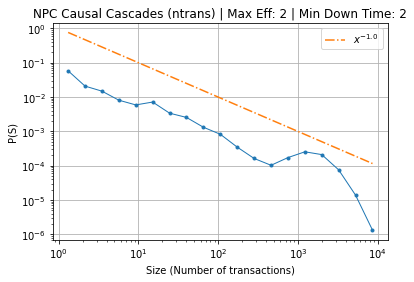

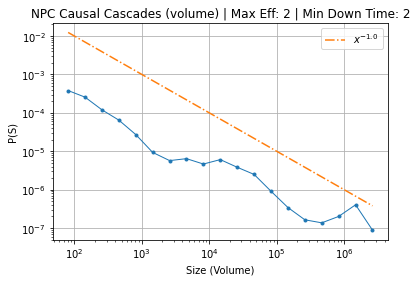

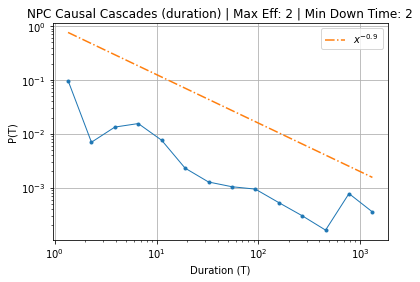

In [9]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*1, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9), '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

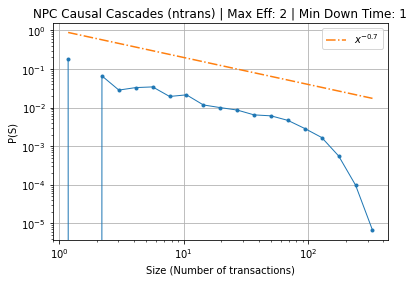

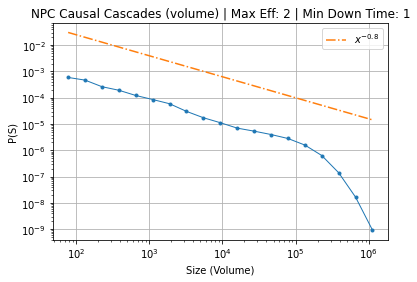

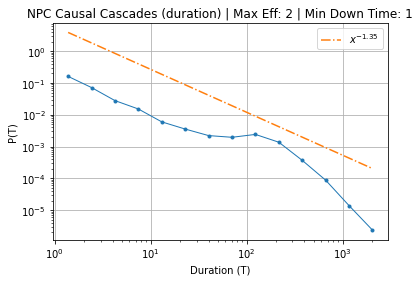

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

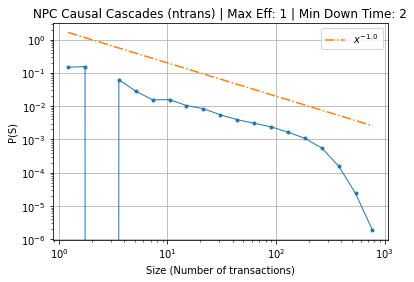

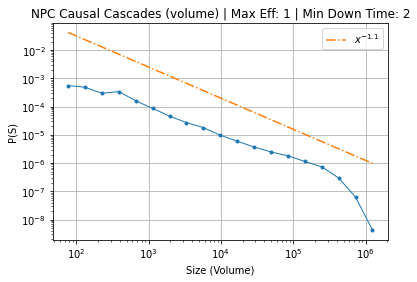

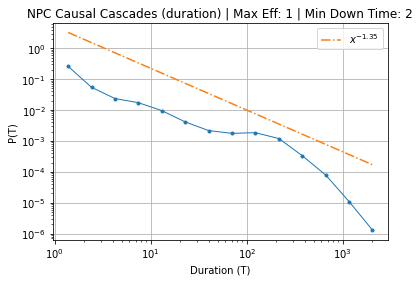

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

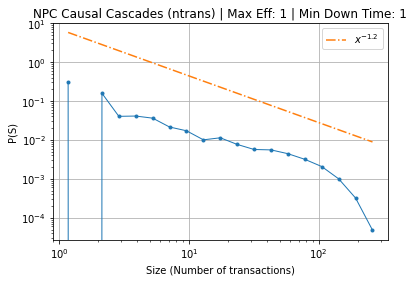

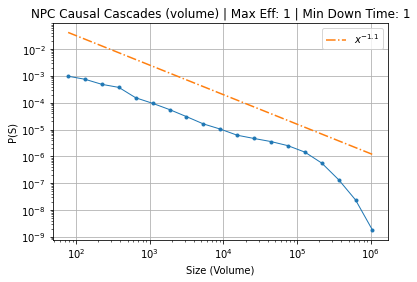

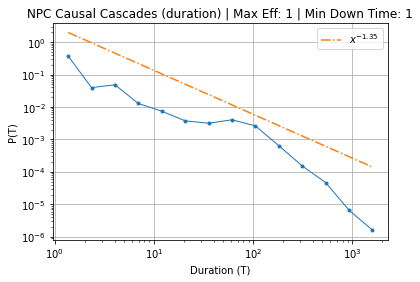

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
